In [2]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

In [3]:
import sys
if "../src/" not in sys.path:
    sys.path.insert(0,"../src/")
from pbcpy.grid import DirectGrid, ReciprocalGrid
from pbcpy.field import DirectField, ReciprocalField
from pbcpy.functionals import *
from pbcpy.local_functionals_utils import x_TF_y_vW 
from pbcpy.nonlocal_functionals_utils import LindhardFunction, MGP_kernel, WT_kernel,MGP_kernel_E1
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF

%matplotlib inline
%load_ext autoreload
%autoreload 2
#

In [4]:
KS =PP(filepp='/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Big_data/Mg_cluster/Density/Mg_KS.pp').read()

In [5]:
MGP_KE =PP(filepp='/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Big_data/Mg_cluster/Density/LDA_rho.pp').read()

In [6]:
#KS = PP(filepp='/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Fukui/Mg/Density_35/Mg_KS_0.pp').read()

In [7]:
#MGP0=PP(filepp='/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Fukui/Mg/Density_35/density_MGP_0.pp').read()

In [8]:
#LM0= PP(filepp='/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Fukui/Mg/Density_35/LDA_rho.pp').read()

In [9]:
KS=KS.field
#MGP0=MGP0.field
#LM0=LM0.field
MGP_KE=MGP_KE.field

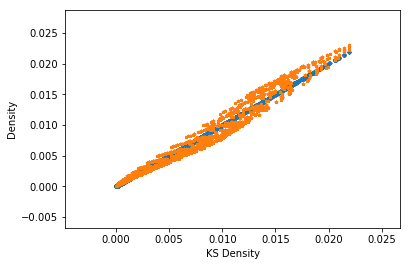

In [18]:
plt.scatter(KS,KS,s=5,label='KS')
#plt.scatter(KS,MGP0,marker='v')
#plt.scatter(KS,LM0,marker='*')
plt.scatter(KS,MGP_KE,marker='*',s=5,label='MGP')
plt.xlabel('KS Density')
plt.ylabel('Density')
plt.show()

In [11]:
KS=PP(filepp="/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Fukui/Si/Density/KS.pp").read()
KS=KS.field

In [12]:
HC=PP(filepp="/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Fukui/Si/Density/HC.pp").read()
HC=HC.field

In [13]:
MGP0=PP(filepp="/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Fukui/Si/Density/MGP.pp").read()
MGP0=MGP0.field

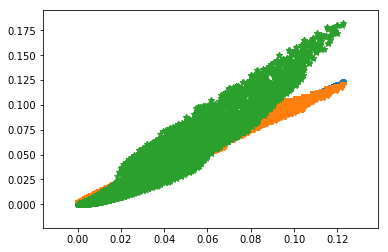

In [16]:
plt.scatter(KS,KS)
plt.scatter(KS,HC,marker='v')
plt.scatter(KS,MGP0,marker='*')
plt.show()

In [8]:
density_real_space = mol.field

# Local and Semilocal Functionals energy and potential

In [9]:
TFvW = x_TF_y_vW(density_real_space,x=1,y=1,Sigma=0.05)

# Nonlocal Functionals energy and potential

In [10]:
rho0=density_real_space.integral() / density_real_space.grid.volume
print(rho0)

0.0268476949077


In [11]:
rho0=np.real(density_real_space.fft()[0,0,0,0] / density_real_space.grid.volume)
print(rho0)

0.0268476949077


In [19]:
rho0=0.02
rho0_test=0.02

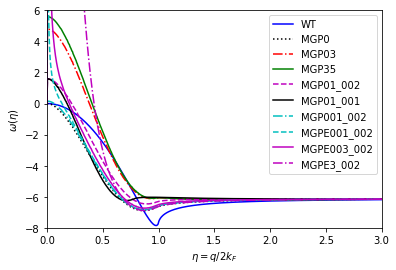

In [25]:
#
# Cute-looking kernels
#
q=np.linspace(0,8,1000)
mgp0 = MGP_kernel(q,0.02,0.0,0.0,500)
mgp03 = MGP_kernel(q,0.02,0.3,0.3,500)
mgp35 = MGP_kernel(q,0.02,0.35,0.35,500)
mgp01_002=MGP_kernel(q,0.02,0.1,0.1,500)
mgp01_001=MGP_kernel(q,0.01,0.1,0.1,500)
mgp001_002=MGP_kernel(q,0.02,0.01,0.01,500)
mgpe001_002=MGP_kernel_E1(q,0.02,0.01,0.01,500)
mgpe003_002=MGP_kernel_E1(q,0.02,0.03,0.03,500)
mgpE03_002=MGP_kernel_E1(q,0.02,1.0,3,500)


wtker = WT_kernel(q,rho0)
eta = q/(2.0 * (3.0 * rho0 * np.pi**2)**(1.0/3.0))
WT=WT_kernel(q,rho0)

plt.plot(eta,wtker,color='blue',label='WT',linestyle='-')
plt.plot(eta,mgp0,label='MGP0',color='black',linestyle=':')
plt.plot(eta,mgp03,label='MGP03',color='red',linestyle='-.')
plt.plot(eta,mgp35,label='MGP35',color='green',linestyle='-')
plt.plot(eta,mgp01_002,label='MGP01_002',color='m',linestyle='--')
plt.plot(eta,mgp01_001,label='MGP01_001',color='k',linestyle='-')
plt.plot(eta,mgp001_002,label='MGP001_002',color='c',linestyle='-.')
plt.plot(eta,mgpe001_002,label='MGPE001_002',color='c',linestyle='--')
plt.plot(eta,mgpe003_002,label='MGPE003_002',color='m',linestyle='-')
plt.plot(eta,mgpE03_002,label='MGPE3_002',color='m',linestyle='-.')



plt.xlim(0,3)
plt.ylim(-8,6)
plt.xlabel('$\eta=q/2k_{F}$')
plt.ylabel('$\omega(\eta)$')
plt.legend()
plt.savefig("./kernels_comparison.eps")
plt.show()

In [9]:
q = np.sqrt(density_real_space.grid.get_reciprocal().gg)

In [10]:
wtker = WT_kernel(q,rho0)

In [11]:
#WTdens = dens_real_space.energy_density(kernel=wtker,a=(5.0/6.0),b=(5.0/6.0),c=1.0)
rhofs = density_real_space**(5.0/6.0)
rhofs_g = rhofs.fft()
rhofs_kernel = WT_kernel(q,rho0)*rhofs_g


In [12]:
WT_edens = rhofs_kernel.ifft(force_real=True)*rhofs 

In [25]:
a.dtype

dtype('float64')

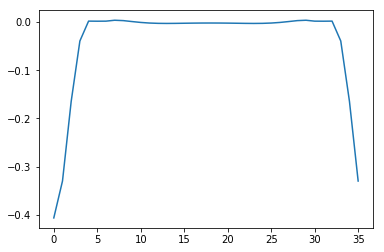

In [13]:
plt.plot(WT_edens[:,0,0,0])
plt.show()

In [14]:
rhoos = density_real_space**(-1.0/6.0)

In [15]:
WT_pot = (5.0/6.0)*2.0* rhoos * rhofs_kernel.ifft(force_real=True)

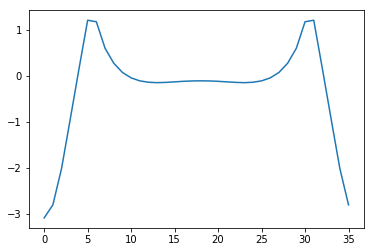

In [16]:
plt.plot(WT_pot[:,0,0,0])
plt.show()

In [17]:
WT_NL_Functional = Functional( energydensity=WT_edens, potential=WT_pot,kernel=WT_kernel(q,rho0))

In [18]:
WT = WT_NL_Functional.sum(x_TF_y_vW(x=1.0,y=1.0,rho=density_real_space,Sigma=0.15))

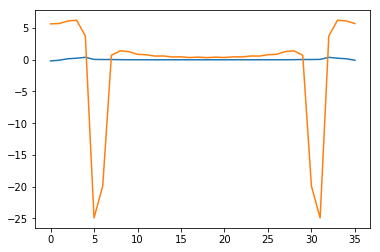

In [19]:
plt.plot(WT.energydensity[:,0,0,0])
plt.plot(WT.potential[:,0,0,0])
plt.show()

In [20]:
WT.energydensity.integral()*27.211385

79.312187821903379

In [21]:
WT_NL_Functional.energydensity.integral()*27.211385

-5.501165471606706